In [1]:
import numpy as np
import pandas as pd

### Modify mutation table

In [2]:
mut_orig = pd.DataFrame.from_csv('Sanger_molecular_data/mutations.csv', header=0, index_col=False)

In [3]:
mut_orig.shape

(146287, 32)

In [4]:
mut2 = mut_orig.dropna(subset=['Mutation.Description'])

In [5]:
pd.isnull(mut2).any()

Gene.name                   False
Accession.Number            False
Gene.CDS.length             False
HGNC.ID                      True
cell_line_name              False
ID_sample                   False
ID_tumour                   False
Primary.site                False
Site.subtype                False
Primary.histology           False
Histology.subtype           False
Genome.wide.screen          False
Mutation.ID                 False
Mutation.CDS                False
Mutation.AA                 False
Mutation.Description        False
Mutation.zygosity           False
GRCh                        False
Mutation.genome.position    False
strand                      False
SNP                          True
FATHMM.prediction            True
Mutation.somatic.status     False
Pubmed_PMID                  True
ID_STUDY                     True
Institute                    True
Institute.Address            True
Catalogue.Number             True
Sample.source               False
Tumour.origin 

In [6]:
mut = mut2.copy()
silent = mut['Mutation.Description'] == 'Substitution - coding silent'
mut = mut.drop(mut[silent].index)
mut = mut.drop('Accession.Number', axis=1)

In [7]:
mut.shape

(56744, 31)

In [8]:
mut

,Gene.name,Gene.CDS.length,HGNC.ID,cell_line_name,ID_sample,ID_tumour,Primary.site,Site.subtype,Primary.histology,Histology.subtype,...,Mutation.somatic.status,Pubmed_PMID,ID_STUDY,Institute,Institute.Address,Catalogue.Number,Sample.source,Tumour.origin,Age,Comments
0,FRMD4A,3120,25491,HCC1806,907047,824559,breast,NS,carcinoma,ductal_carcinoma,...,Reported in another cancer sample as somatic,NaN,NaN,American Type Culture Collection (ATCC),"P.O. Box 1549, Manassas, VA 20108, USA",CRL-2335,cell-line,primary,60,"Grade:II,Stage:II"
1,LILRB1,1953,6605,HCC1806,907047,824559,breast,NS,carcinoma,ductal_carcinoma,...,Reported in another cancer sample as somatic,NaN,NaN,American Type Culture Collection (ATCC),"P.O. Box 1549, Manassas, VA 20108, USA",CRL-2335,cell-line,primary,60,"Grade:II,Stage:II"
2,FAM110B,1113,28587,HCC1806,907047,824559,breast,NS,carcinoma,ductal_carcinoma,...,Reported in another cancer sample as somatic,NaN,NaN,American Type Culture Collection (ATCC),"P.O. Box 1549, Manassas, VA 20108, USA",CRL-2335,cell-line,primary,60,"Grade:II,Stage:II"
3,WDR96,4998,26684,HCC1806,907047,824559,breast,NS,carcinoma,ductal_carcinoma,...,Reported in another cancer sample as somatic,NaN,NaN,American Type Culture Collection (ATCC),"P.O. Box 1549, Manassas, VA 20108, USA",CRL-2335,cell-line,primary,60,"Grade:II,Stage:II"
4,TCF12,2121,11623,HCC1806,907047,824559,breast,NS,carcinoma,ductal_carcinoma,...,Reported in another cancer sample as somatic,NaN,NaN,American Type Culture Collection (ATCC),"P.O. Box 1549, Manassas, VA 20108, USA",CRL-2335,cell-line,primary,60,"Grade:II,Stage:II"
5,TCF12_ENST00000452095,2109,NaN,HCC1806,907047,824559,breast,NS,carcinoma,ductal_carcinoma,...,Reported in another cancer sample as somatic,NaN,NaN,American Type Culture Collection (ATCC),"P.O. Box 1549, Manassas, VA 20108, USA",CRL-2335,cell-line,primary,60,"Grade:II,Stage:II"
6,SLIT1,4605,11085,HCC1806,907047,824559,breast,NS,carcinoma,ductal_carcinoma,...,Variant of unknown origin,NaN,NaN,American Type Culture Collection (ATCC),"P.O. Box 1549, Manassas, VA 20108, USA",CRL-2335,cell-line,primary,60,"Grade:II,Stage:II"
7,PPM1G,1641,9278,HCC1806,907047,824559,breast,NS,carcinoma,ductal_carcinoma,...,Variant of unknown origin,NaN,NaN,American Type Culture Collection (ATCC),"P.O. Box 1549, Manassas, VA 20108, USA",CRL-2335,cell-line,primary,60,"Grade:II,Stage:II"
8,SERPINA12,1245,18359,HCC1806,907047,824559,breast,NS,carcinoma,ductal_carcinoma,...,Variant of unknown origin,NaN,NaN,American Type Culture Collection (ATCC),"P.O. Box 1549, Manassas, VA 20108, USA",CRL-2335,cell-line,primary,60,"Grade:II,Stage:II"
9,KANK4,2988,27263,HCC1806,907047,824559,breast,NS,carcinoma,ductal_carcinoma,...,Variant of unknown origin,NaN,NaN,American Type Culture Collection (ATCC),"P.O. Box 1549, Manassas, VA 20108, USA",CRL-2335,cell-line,primary,60,"Grade:II,Stage:II"


### Gene expression filter

In [9]:
gex = pd.DataFrame.from_csv('Sanger_molecular_data/gex.csv')

In [10]:
gex

,22RV1,647-V,A549,BFTC-905,BT-20,BT-474,BT-549,C32,CAL-120,CAL-148,...,SW837,SW900,SW948,T-24,T47D,TCCSUP,UACC-812,UM-UC-3,VCaP,VM-CUB-1
TSPAN6,4.804487,8.713556,8.495961,7.813436,7.971621,5.178131,6.383148,5.542645,7.632023,8.121539,...,8.141044,7.755154,7.709982,7.788981,7.342996,7.401340,7.086304,6.410431,5.348023,7.187071
TNMD,2.848128,2.834723,2.886997,2.879330,2.792528,3.015506,2.746627,2.736643,2.964585,2.990916,...,2.911450,2.816921,3.212680,2.984905,2.819535,2.724977,2.952920,2.795879,2.988278,2.691417
DPM1,10.331994,10.504748,9.643436,10.272719,10.601207,10.548792,10.392289,9.890112,10.379553,10.359588,...,10.072444,10.214976,10.170757,10.558936,10.786582,9.864280,11.536803,10.326887,9.000925,10.184775
SCYL3,5.145387,3.792188,4.154471,4.050385,5.622674,5.829252,3.802817,3.346422,3.614794,5.680584,...,4.531813,4.388774,4.606470,3.789149,4.677363,3.843770,4.520248,3.512380,4.306414,3.512961
C1orf112,3.545193,3.946664,3.307310,3.701491,3.740521,3.800657,4.379548,3.067727,3.380681,4.056182,...,3.619282,3.946621,3.858040,3.674749,3.482290,4.383248,3.324127,3.291974,3.414812,3.823379
FGR,2.981772,3.106757,3.132815,3.036505,3.377295,3.446415,3.183691,3.253538,3.324692,3.450374,...,3.123146,3.088256,3.188375,3.199688,3.321172,3.336882,3.188895,3.308299,3.352145,3.322545
CFH,3.297096,3.382905,9.146877,5.133806,3.074383,3.107748,6.262654,3.300831,3.566350,3.723503,...,3.159148,7.497956,3.501447,5.233954,3.385376,3.357930,3.241747,5.719281,3.596993,5.631177
FUCA2,7.914830,7.886826,7.800473,8.200329,7.290184,6.727436,8.160151,8.074968,8.204530,6.201861,...,8.743540,7.841270,8.180214,7.964240,7.662135,8.089836,7.563625,8.663654,7.196524,8.434965
GCLC,8.366785,6.176860,7.921442,5.808631,6.322244,5.862634,5.726798,5.234662,5.235118,5.556517,...,5.842489,5.799141,6.820641,4.667093,5.906962,5.721922,4.767813,5.448271,5.519796,5.250324
NFYA,5.287493,5.373848,4.297621,4.880755,5.291903,5.337411,5.552501,4.348398,5.369039,5.508345,...,4.922979,5.585866,5.474809,4.926298,5.063413,4.795732,5.085422,5.058603,5.160911,4.947160


In [11]:
gex.index

Index(['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112', 'FGR', 'CFH', 'FUCA2',
       'GCLC', 'NFYA', 
       ...
       'LINC00514', 'OR1D5', 'ZNF234', 'MYH4', 'LINC00526', 'PPY2', 'KRT18P55',
       'POLRMTP1', 'UBL5P2', 'TBC1D3P5'],
      dtype='object', length=17419)

In [12]:
cgm_cols = ['Cell_line', 'Gene', 'Mutation']
cgm = pd.DataFrame(columns=cgm_cols)
cgm

,Cell_line,Gene,Mutation


In [13]:
anomalies = 0
total = 0
for index, row in mut.iterrows():
    gene = row['Gene.name']
    cell_line = row['cell_line_name']
    
    if (gene in gex.index and cell_line in gex.columns):
        upper = np.mean(gex.ix[gene]) + 2*np.std(gex.ix[gene])  # mean of particular gene + 2*std
        lower = np.mean(gex.ix[gene]) - 2*np.std(gex.ix[gene])
        if gex.ix[gene, cell_line] < lower or gex.ix[gene, cell_line] > upper:  # if gene over or underexpressed
            anomalies += 1
            cgm = cgm.append(pd.DataFrame([[cell_line, gene, row['Mutation.Description']]], columns=cgm_cols), ignore_index=True)
        total += 1
print(str(anomalies) + ', ' + str(total))

1558, 33080


In [14]:
set(mut['Mutation.Description'].values)

{'Complex - compound substitution',
 'Complex - deletion inframe',
 'Complex - frameshift',
 'Complex - insertion inframe',
 'Deletion - Frameshift',
 'Deletion - In frame',
 'Insertion - Frameshift',
 'Insertion - In frame',
 'Nonstop extension',
 'Substitution - Missense',
 'Substitution - Nonsense',
 'Unknown'}

In [15]:
cgm.to_csv('Molecular_expanded/cell_gene_mut.csv', index_col=False)

substitution - missense: changes the amino acid, could be big or small effect
substitution - nonsense: original amino acid changed to stop codon, protein terminates - useless protein
frameshifts: most likely useless protein

In [14]:
1558/33080  # 3 std, no coding silent

0.047097944377267234

In [15]:
2074/44004  # 3 std, yes coding silent

0.047132078901918006

In [17]:
496/44004  # 2 std, no coding silent

0.01127170257249341

In [19]:
367/33080  # 2 std, yes coding silent

0.011094316807738815

Possible features to include:
- num mutations
- num impactful mutations (i.e. differentially expressed corresponding gene/cell_line)
- weighted mutations: heavier weight to frameshifts, lower weights to missense substitutions, etc. (prob not good idea, would be arbitrary weights)
- num each type of mutation
- cluster of mutations?
- drug target correlation with mutated genes 
    - 1 feature: number of targets corresponding to mutated gene
    - 2 features: 1 feature for compound_a targets, another for compound_b

## Model

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import cross_validation, metrics
from scipy.stats import stats

In [14]:
df = pd.DataFrame.from_csv('Train_data/with_interaction_biogrid.csv')
#df = df.drop(['A_HBD', 'B_HBD', 'A_Lipinski', 'B_Lipinski', 'A_ALogP/XLogP', 'B_ALogP/XLogP'], axis=1)
df = df.drop(['A_HBD', 'B_HBD', 'A_PSA', 'B_PSA', 'A_ALogP/XLogP', 'B_ALogP/XLogP', 'A_Lipinski', 'B_Lipinski'], axis=1)

In [15]:
def pearson(y, y_pred):
    return stats.pearsonr(y, y_pred)[0]
pearson_scorer = metrics.make_scorer(pearson)

### Original

In [16]:
df = df.iloc[np.random.permutation(len(df))]
y = df['SYNERGY_SCORE'].values
X = pd.get_dummies(df.drop('SYNERGY_SCORE', axis=1), columns=['CELL_LINE', 'COMPOUND_A', 'COMPOUND_B', 'Disease_area']).values

In [17]:
for i in range(3):
    gbr = GradientBoostingRegressor(n_estimators=1000, max_depth=5, loss='huber',
                                        max_features='log2', learning_rate=0.03)
    pearsons = cross_validation.cross_val_score(gbr, X, y, scoring=pearson_scorer, cv=5)
    print(np.mean(pearsons))

0.640785891285
0.632122136304
0.647732287352


### Test features

**confirmed beneficial:** # impactful mutations

In [21]:
cgm = pd.DataFrame.from_csv('Molecular_expanded/cell_gene_mut.csv')
np.sum(cgm['Cell_line']=='HCC1806')

8

In [22]:
df['Num_mut'] = 0
for i, row in df.iterrows():
    df.set_value( i, 'Num_mut', np.sum(cgm['Cell_line']==row['CELL_LINE']) )

In [23]:
df.loc[df['CELL_LINE']=='HCC1806']

,CELL_LINE,COMPOUND_A,COMPOUND_B,MAX_CONC_A,MAX_CONC_B,IC50_A,H_A,Einf_A,IC50_B,H_B,...,B_#RotBonds,B_Arom Rings,B_Heavy atoms,B_QED,GEX_CLUSTER,THERAPY_CLUSTER,Disease_area,Target_share,Target_interaction,Num_mut
520,HCC1806,AKT_SGK,PIK3C,1,1,0.305450,10.000000,20.899430,0.339596,10.000000,...,5.000,4.000,35.000,0.43000,0,2,Breast,0,1.000000,8
925,HCC1806,BCL2_BCL2L1,PIM1,1,1,1.000000,10.000000,76.200113,1.000000,0.000000,...,3.000,2.000,27.000,0.80000,5,1,Breast,0,0.500000,8
1357,HCC1806,ERBB,MAP2K_1,1,1,0.294224,1.338853,29.938770,1.000000,0.000000,...,6.000,3.000,27.000,0.39000,1,2,Breast,0,1.000000,8
2062,HCC1806,PIK3C,PIP5K1,1,1,1.000000,0.000000,100.000000,0.353652,2.714720,...,3.068,2.597,23.849,0.63639,1,0,Breast,0,0.000000,8
313,HCC1806,AKT,PIP5K1,1,1,1.000000,0.000000,100.000000,1.000000,10.000000,...,3.068,2.597,23.849,0.63639,4,0,Breast,0,0.000000,8
897,HCC1806,BCL2_BCL2L1,MAP2K_1,1,1,0.375405,0.995064,11.053630,1.000000,0.000000,...,6.000,3.000,27.000,0.39000,2,2,Breast,0,0.500000,8
1883,HCC1806,MAP2K_1,PIM1,1,1,0.396748,10.000000,80.898154,0.258670,1.069386,...,3.000,2.000,27.000,0.80000,2,0,Breast,0,0.500000,8
620,HCC1806,ALK_IGFR,MTOR_1,1,1,0.238087,1.223534,0.000000,0.316964,10.000000,...,4.000,3.000,32.000,0.63000,2,3,Breast,0,0.500000,8
2122,HCC1806,PIK3CB_PIK3CD,SLC16A4,1,1,1.000000,0.000000,100.000000,1.000000,10.000000,...,3.068,2.597,23.849,0.63639,6,1,Breast,0,0.000000,8
914,HCC1806,BCL2_BCL2L1,PIK3CA_4,1,1,0.332840,10.000000,67.099430,1.000000,0.000000,...,5.000,2.000,30.000,0.74000,1,1,Breast,0,0.333333,8


In [128]:
y = df['SYNERGY_SCORE'].values
X = pd.get_dummies(df.drop(['SYNERGY_SCORE'], axis=1), columns=['CELL_LINE', 'COMPOUND_A', 'COMPOUND_B', 'Disease_area']).values
for i in range(3):
    gbr = GradientBoostingRegressor(n_estimators=1000, max_depth=5, loss='huber',
                                        max_features='log2', learning_rate=0.03)
    pearsons = cross_validation.cross_val_score(gbr, X, y, scoring=pearson_scorer, cv=5)
    print(np.mean(pearsons))

0.646524796559
0.646488713182
0.651325003012


**testing**: # drug targets matching mutations

In [25]:
drug_targ = pd.DataFrame.from_csv('Drug_expanded/targets.csv')

In [151]:
dfmod = df.copy()

In [152]:
# dfmod['A_mut_targ'] = 0
# dfmod['B_mut_targ'] = 0
# for i, row in dfmod.iterrows():
#     a_targs = drug_targ.ix[row['COMPOUND_A'], 'Target'].split(',')
#     b_targs = drug_targ.ix[row['COMPOUND_B'], 'Target'].split(',')
#     cell_muts = mut.loc[mut['cell_line_name']==row['CELL_LINE']]  # mutation data with given cell line
    
#     a_count, b_count = 0, 0
#     match_genes = list(cell_muts['Gene.name'].values) 
#     for t in a_targs:
#         a_count += match_genes.count(t)   # add matching genes
#     for t2 in b_targs:
#         b_count += match_genes.count(t2)
        
#     dfmod.set_value(i, 'A_mut_targ', a_count)
#     dfmod.set_value(i, 'B_mut_targ', b_count)
dfmod['mut_targ'] = 0
for i, row in dfmod.iterrows():
    targs = drug_targ.ix[row['COMPOUND_A'], 'Target'].split(',')
    b_targs = drug_targ.ix[row['COMPOUND_B'], 'Target'].split(',')
    targs.extend(b_targs) 
    cell_muts = mut.loc[mut['cell_line_name']==row['CELL_LINE']]  # mutation data with given cell line
    
    count = 0
    match_genes = list(cell_muts['Gene.name'].values) 
    for t in targs:
        count += match_genes.count(t)   # add matching genes
    
    dfmod.set_value(i, 'mut_targ', count)

In [153]:
ymod = dfmod['SYNERGY_SCORE'].values
Xmod = pd.get_dummies(dfmod.drop(['SYNERGY_SCORE'], axis=1), columns=['CELL_LINE', 'COMPOUND_A', 'COMPOUND_B', 'Disease_area']).values

In [154]:
for i in range(3):
    gbr = GradientBoostingRegressor(n_estimators=1000, max_depth=5, loss='huber',
                                        max_features='log2', learning_rate=0.03)
    pearsons = cross_validation.cross_val_score(gbr, Xmod, ymod, scoring=pearson_scorer, cv=5) #scoring=pearson_scorer, 
    print(np.mean(pearsons))

0.643037523153
0.64896924948
0.629600780687


#### Feature importances

In [67]:
feats = ['MAX_CONC_A', 'MAX_CONC_B',
       'IC50_A', 'H_A', 'Einf_A', 'IC50_B', 'H_B', 'Einf_B',
       'A_HBA', 'A_cLogP', 'A_MW', 'A_PSA', 'A_#RotBonds', 'A_Arom Rings',
       'A_Heavy atoms', 'A_QED', 'B_HBA', 'B_cLogP', 'B_MW', 'B_PSA',
       'B_#RotBonds', 'B_Arom Rings', 'B_Heavy atoms', 'B_QED', 'GEX_CLUSTER',
       'THERAPY_CLUSTER', 'Target_share', 'Target_interaction',
       'Num_mut', 'A_mut_targ', 'B_mut_targ']
gbr_feats = GradientBoostingRegressor(n_estimators=1000, max_depth=5, loss='huber',
                                        max_features='log2', learning_rate=0.03).fit(Xmod, ymod)
importances = gbr_feats.feature_importances_[:31]
fi = dict(zip(feats, importances))

In [68]:
import operator
fi_sorted = sorted(fi.items(), key=operator.itemgetter(1))
fi_sorted

[('Target_share', 0.00090197514694565981),
 ('B_mut_targ', 0.0032695832721409499),
 ('A_mut_targ', 0.0055002414978961248),
 ('B_Arom Rings', 0.011273049722495789),
 ('A_Arom Rings', 0.01247217650983712),
 ('A_#RotBonds', 0.012473312610611943),
 ('A_MW', 0.012642715020346557),
 ('B_Heavy atoms', 0.012994888923562984),
 ('B_MW', 0.013409700041813908),
 ('MAX_CONC_B', 0.013467117441383751),
 ('B_HBA', 0.013486904365615648),
 ('B_#RotBonds', 0.013541796776282516),
 ('A_HBA', 0.013789176602523096),
 ('MAX_CONC_A', 0.014532811885980533),
 ('Target_interaction', 0.014560664225792422),
 ('A_cLogP', 0.014782137637530814),
 ('A_Heavy atoms', 0.01503544744898856),
 ('B_PSA', 0.015048859803033658),
 ('B_cLogP', 0.015214686860483708),
 ('A_QED', 0.015216874255654581),
 ('THERAPY_CLUSTER', 0.015617116996023523),
 ('B_QED', 0.016553037914311366),
 ('A_PSA', 0.018308085984354638),
 ('Num_mut', 0.018385276347624303),
 ('GEX_CLUSTER', 0.022806737656399262),
 ('H_B', 0.037730728166039285),
 ('IC50_B', 0.

## TSGene DB

In [19]:
ts1 = pd.DataFrame.from_csv('Molecular_expanded/tumor_supressors_tsgeneDB.csv')
ts2 = pd.DataFrame.from_csv('Molecular_expanded/Human_TSGs.csv')

In [70]:
ts1_genes = ts1['Gene_symbol'].values
ts2_genes = ts2['GeneSymbol'].values
ts_genes = set(ts1_genes) & set(ts2_genes)
print(len(ts1_genes))
print(len(ts2_genes))
print(len(ts_genes))

716
1217
639


In [95]:
ts = set(ts_genes) & set(gex.index)
tsgex = gex.loc[ts]
tsgex

,22RV1,647-V,A549,BFTC-905,BT-20,BT-474,BT-549,C32,CAL-120,CAL-148,...,SW837,SW900,SW948,T-24,T47D,TCCSUP,UACC-812,UM-UC-3,VCaP,VM-CUB-1
ZYX,3.941590,5.204366,4.912069,4.664766,5.133911,4.941155,5.655587,6.215595,4.415610,4.231359,...,4.560421,4.558872,5.163735,4.741197,3.921108,5.492629,4.283938,5.805750,4.355522,5.129551
GADD45G,6.884257,2.816534,3.121235,3.297829,4.095581,6.002934,2.820640,2.987849,2.758568,7.025054,...,3.303425,3.049742,3.727669,3.019107,4.108757,3.094141,5.361575,3.093164,4.279718,3.209478
SASH1,4.296142,5.933057,4.261597,3.626372,6.256945,4.680919,5.366439,6.963580,5.152033,5.823953,...,5.439911,4.513081,5.117161,5.817025,4.687558,5.393250,5.591640,4.734545,5.249760,5.337148
MAP4K1,3.016747,3.040741,2.874760,3.005089,3.119357,3.428802,2.970357,3.181064,2.941828,3.246280,...,3.583015,2.934833,3.087185,3.030658,3.203557,2.836363,3.105644,2.856904,3.378733,3.032270
CST5,3.161125,3.372700,3.006167,3.060336,3.153971,3.465202,3.225971,3.312577,2.990222,3.248122,...,3.354106,2.976170,3.359341,3.222965,3.214966,3.301471,3.366584,3.086696,2.919890,3.240980
CADM3,3.314637,3.031378,3.178965,3.166439,3.291688,3.139113,2.954189,3.345058,3.101887,3.749908,...,3.279966,3.152755,3.271687,3.140584,3.508587,3.295337,3.216208,3.226101,3.545501,3.207830
SIRT2,5.239788,4.618523,5.333696,4.189891,6.008036,5.356842,6.069756,6.456122,5.388351,5.613326,...,4.765165,4.797608,5.608583,4.777952,4.625962,4.590109,6.597426,4.590714,4.892502,4.796700
RPL10,6.832162,6.870249,6.994830,5.960790,6.776642,7.536564,7.961996,7.074002,6.763491,7.620725,...,9.784303,7.035165,6.628275,7.411194,6.081554,6.848690,7.067343,7.041893,7.485062,7.221335
NF2,4.462146,4.915568,3.858324,4.342475,4.391052,4.046314,4.549624,4.507336,5.372245,3.868760,...,3.870313,4.744224,3.910822,5.238765,4.147239,4.937637,4.246255,5.259157,4.263257,5.374764
DKK1,6.325388,7.621139,12.122421,10.948822,4.157821,8.083121,7.840029,3.226377,12.114559,9.266994,...,6.712088,10.716862,2.956745,11.130120,10.434384,11.225248,5.282694,7.454326,2.767777,12.219899


In [99]:
for tsg in tsgex.index:
    row = tsgex.loc[tsg]
    upper = np.mean(row) + 6*np.std(row)
    lower = np.mean(row) - 6*np.std(row)
    
    if not (any(row > upper) or any(row < lower)):
        tsgex.drop(tsg, inplace=True)
tsgex.shape

(37, 83)

In [107]:
for i, row in dfmod.iterrows():
    cl = row['CELL_LINE']
    for tsg in tsgex.index:
        if cl in tsgex.columns:
            dfmod.set_value(i, tsg, tsgex.ix[tsg, cl])
        else:
            dfmod.set_value(i, tsg, np.mean(tsgex.loc[tsg]))  # if no cell line gex data available, assume mean of gex
                                                              # cases: MDA-MB-175-VII and NCI-H1437
dfmod

,CELL_LINE,COMPOUND_A,COMPOUND_B,MAX_CONC_A,MAX_CONC_B,IC50_A,H_A,Einf_A,IC50_B,H_B,...,SCGB3A1,PLXNC1,ZMYND10,RASSF2,PAEP,DMBT1,SLC5A8,CHD5,TMPRSS11A,PCDH10
1120,NCI-H226,CarboTaxol,CSNK2A1_2,0.10,0.01,0.004267,1.957945,0.000000,0.001606,3.191878,...,3.196587,3.105170,2.758353,2.904278,3.244633,3.106455,2.967927,3.017443,3.012289,3.069359
869,MDA-MB-157,BCL2_BCL2L1,FGFR,1.00,1.00,0.037093,2.848411,38.622217,1.000000,0.000000,...,3.417108,2.848206,3.142725,2.936310,3.007921,3.054710,2.756604,3.424931,2.837982,3.256840
282,CAL-120,AKT,PIK3C_2,1.00,1.00,1.000000,10.000000,62.600248,0.244725,2.877772,...,3.034160,2.935529,3.573663,2.876825,3.128143,3.035675,2.835125,3.107214,2.796175,3.089691
660,MDA-MB-231,ATR_4,BCL2_BCL2L1,1.00,1.00,1.000000,0.757933,1.701477,0.972413,9.996671,...,3.181619,3.926466,2.869493,3.546421,2.951307,3.182094,2.956081,3.136598,2.861495,3.060358
1923,HCC38,MAP2K_1,SLC16A4,1.00,1.00,1.000000,0.000000,100.000000,0.241770,4.489731,...,2.917921,2.905185,2.619804,2.898116,3.195140,3.023079,2.750002,3.248283,2.824575,3.479549
671,DMS-114,ATR_4,CarboTaxol,0.01,3.00,0.001789,2.931865,10.639634,1.060265,10.000000,...,3.108994,2.900969,3.393863,3.532048,2.939697,3.020590,2.719290,4.446063,2.762481,3.215187
1389,KU-19-19,ERBB,MTOR_1,1.00,3.00,1.000000,10.000000,56.600823,1.000000,0.000000,...,2.971459,3.787799,2.994033,3.091832,3.257342,3.143533,2.988031,3.292097,2.752586,3.111552
2039,BFTC-905,PIK3C,PIM1,3.00,3.00,3.000000,0.337757,80.476441,1.453983,0.795855,...,3.008259,2.942337,2.777214,2.799285,3.048194,3.259930,2.902307,2.998725,4.267372,2.889307
520,HCC1806,AKT_SGK,PIK3C,1.00,1.00,0.305450,10.000000,20.899430,0.339596,10.000000,...,3.077701,3.158744,2.937235,2.997616,3.063270,3.105196,2.987275,3.032658,2.863135,3.115976
784,SW620,BCL2,IGFR_4,3.00,0.30,3.000000,1.618277,43.744349,0.002947,10.000000,...,3.051775,3.345778,2.891563,2.985521,3.041921,3.626924,2.963113,3.179157,2.959542,3.041055


In [108]:
ymod = dfmod['SYNERGY_SCORE'].values
Xmod = pd.get_dummies(dfmod.drop(['SYNERGY_SCORE'], axis=1), columns=['CELL_LINE', 'COMPOUND_A', 'COMPOUND_B', 'Disease_area']).values

In [109]:
for i in range(3):
    gbr = GradientBoostingRegressor(n_estimators=1000, max_depth=5, loss='huber',
                                        max_features='log2', learning_rate=0.03)
    pearsons = cross_validation.cross_val_score(gbr, Xmod, ymod, scoring=pearson_scorer, cv=5) #scoring=pearson_scorer, 
    print(np.mean(pearsons))

0.646812045651
0.643797026162
0.642687747266


In [92]:
any(tsgex.loc['ZYX'] > 10)

False

### tsgene - mutation correlation

In [110]:
cgm

,Cell_line,Gene,Mutation
0,HCC1806,TXNDC11,Unknown
1,HCC1806,MUC16,Substitution - Missense
2,HCC1806,MUC16,Substitution - Nonsense
3,HCC1806,UBE2M,Substitution - Missense
4,HCC1806,MLL3,Substitution - Missense
5,HCC1806,GCC2,Substitution - Missense
6,HCC1806,RAPGEF3,Substitution - Missense
7,HCC1806,GALM,Substitution - Missense
8,NCI-H358,KRAS,Substitution - Missense
9,NCI-H358,SLC16A14,Substitution - Missense


In [113]:
cgm[cgm['Cell_line']=='HCC1806']['Gene'].values

array(['TXNDC11', 'MUC16', 'MUC16', 'UBE2M', 'MLL3', 'GCC2', 'RAPGEF3',
       'GALM'], dtype=object)

In [114]:
hcc1806_muts = cgm[cgm['Cell_line']=='HCC1806']['Gene'].values
len(set(hcc1806_muts) & set(ts2_genes))

0

In [125]:
tsg_count = {}
for index, row in mut.iterrows():
    gene = row['Gene.name']
    cell_line = row['cell_line_name']
    tsg_count[cell_line] = int(gene in ts2_genes or gene in ts1_genes)  

In [126]:
tsg_count

{'22RV1': 0,
 '647-V': 0,
 'A549': 1,
 'BFTC-905': 0,
 'BT-20': 0,
 'BT-474': 0,
 'BT-549': 0,
 'C32': 0,
 'CAL-120': 0,
 'CAL-148': 0,
 'CAL-51': 0,
 'CAMA-1': 0,
 'COLO-205': 0,
 'Calu-3': 0,
 'Calu-6': 0,
 'DMS-114': 0,
 'DU-4475': 0,
 'EVSA-T': 0,
 'HCC1143': 0,
 'HCC1187': 0,
 'HCC1395': 1,
 'HCC1419': 0,
 'HCC1428': 0,
 'HCC1500': 0,
 'HCC1569': 0,
 'HCC1806': 0,
 'HCC1937': 0,
 'HCC1954': 0,
 'HCC38': 0,
 'HCC70': 0,
 'HCT-116': 0,
 'HT-1197': 0,
 'HT-1376': 0,
 'HT-29': 0,
 'Hs-578-T': 0,
 'J82': 0,
 'KATOIII': 0,
 'KMS-11': 0,
 'KU-19-19': 0,
 'LS-513': 0,
 'M14': 0,
 'MCF7': 0,
 'MDA-MB-157': 0,
 'MDA-MB-175-VII': 0,
 'MDA-MB-231': 0,
 'MDA-MB-361': 0,
 'MDA-MB-415': 0,
 'MDA-MB-436': 0,
 'MDA-MB-453': 1,
 'MDA-MB-468': 0,
 'MFM-223': 0,
 'NCI-H1299': 0,
 'NCI-H1437': 0,
 'NCI-H1563': 0,
 'NCI-H1703': 1,
 'NCI-H1793': 0,
 'NCI-H1975': 0,
 'NCI-H2085': 0,
 'NCI-H2170': 0,
 'NCI-H2228': 0,
 'NCI-H226': 0,
 'NCI-H2291': 0,
 'NCI-H23': 0,
 'NCI-H3122': 0,
 'NCI-H358': 0,
 'NCI-H5

In [131]:
dfmod['tsmut'] = 0
for i, row in dfmod.iterrows():
    cl = row['CELL_LINE']
    dfmod.set_value(i, 'tsmut', tsg_count[cl])

In [137]:
ymod = dfmod['SYNERGY_SCORE'].values
Xmod = pd.get_dummies(dfmod.drop(['SYNERGY_SCORE'], axis=1), columns=['CELL_LINE', 'COMPOUND_A', 'COMPOUND_B', 'Disease_area']).values

In [150]:
for i in range(3):
    gbr = GradientBoostingRegressor(n_estimators=1000, max_depth=5, loss='huber',
                                        max_features='log2', learning_rate=0.03)
    pearsons = cross_validation.cross_val_score(gbr, Xmod, ymod, scoring=pearson_scorer, cv=5) #scoring=pearson_scorer, 
    print(np.mean(pearsons))

0.638682748795
0.637380983898
0.641575100621


In [302]:
3189/17419

0.052414030656180034

In [303]:
mean_overex = 0
for col in gex.columns:
    mean = np.mean(gex[col].values)
    std = np.std(gex[col].values)
    overex = np.sum(gex[col].values > mean + std)
    mean_overex += overex
mean_overex/83

3189.4216867469881

In [297]:
np.sum(gex['22RV1'].values > 10)

456

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 6)

In [285]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(Xmod, ymod, train_size=0.85)

In [287]:
pearson = 0
while pearson < 0.70:
    gbr = GradientBoostingRegressor(n_estimators=1000, max_depth=7,
                                    max_features='log2', learning_rate=0.03)
    gbr.fit(X_train, y_train)
    pearson = stats.pearsonr(y_test, gbr.predict(X_test))[0]
print(pearson)

KeyboardInterrupt: 

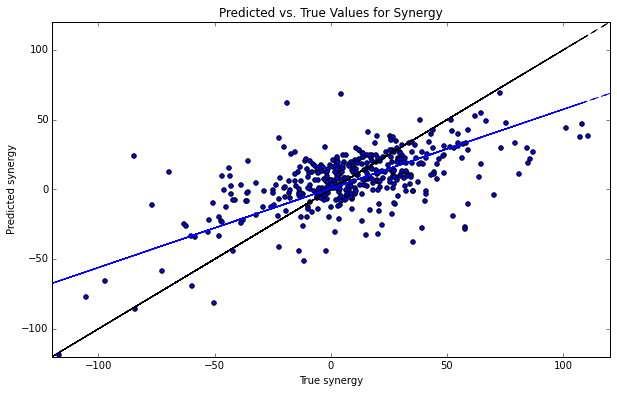

In [247]:
x = y_test
y = gbr.predict(X_test)
plt.scatter(x, y)
plt.plot(x, x, 'k--')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, 'b--')

plt.axis([-120, 120, -120, 120])
plt.title("Predicted vs. True Values for Synergy")
plt.xlabel("True synergy")
plt.ylabel("Predicted synergy")
plt.show()

## Classification

In [145]:
from sklearn.ensemble import GradientBoostingClassifier

In [250]:
def class_pred(graph=False):
    #Yclass = ymod > 0
    Yclass = ymod > np.mean(ymod)+np.std(ymod)
    Yclass = Yclass.astype(int)
    
    for i in range(3):
        gbc = GradientBoostingClassifier(n_estimators=1000, max_depth=5, loss='exponential',
                                    max_features='log2', learning_rate=0.03)
        accuracies = cross_validation.cross_val_score(gbc, Xmod, Yclass, cv=5)

        print("Classification accuracy: " + str(np.mean(accuracies)))
        #print("AUC: " + str(metrics.roc_auc_score(y_test, pred)))
        #print("F1: " + str(metrics.f1_score(y_test, pred)))

In [251]:
class_pred()

Classification accuracy: 0.925719382443
Classification accuracy: 0.926647451693
Classification accuracy: 0.926184493726


In [162]:
from scipy import interp

In [271]:
def graph_roc():
#     Yclass = (ymod > 0).astype(int)
    Yclass = ymod > np.mean(ymod)+0.5*np.std(ymod)
    Yclass = Yclass.astype(int)

    # Run classifier with cross-validation and plot ROC curves
    cv = cross_validation.StratifiedKFold(Yclass, n_folds=5)
    classifier = GradientBoostingClassifier(n_estimators=1000, max_depth=7, loss='exponential',
                                    max_features='log2', learning_rate=0.03)

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    for i, (train, test) in enumerate(cv):
        probas_ = classifier.fit(Xmod[train], Yclass[train]).predict_proba(Xmod[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = metrics.roc_curve(Yclass[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Synergy Prediction')
    plt.legend(loc="lower right")
    plt.show()

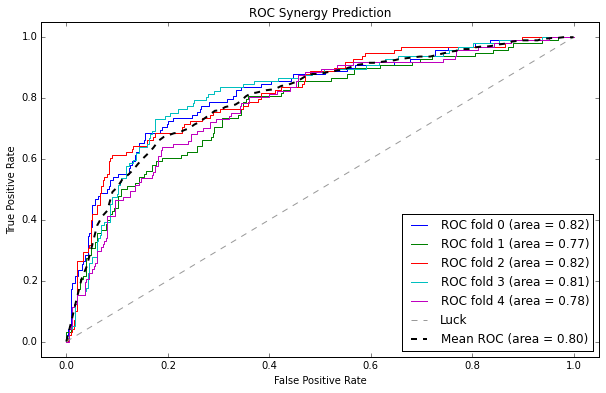

In [272]:
graph_roc()

In [270]:
test_Yclass = ymod > np.mean(ymod)+np.std(ymod)
np.sum(test_Yclass)

168

In [266]:
len(test_Yclass)

2154

In [267]:
488/2154

0.2265552460538533